In [53]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Download Padel


In [3]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-08-10 15:30:48--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.26.156.215
Connecting to github.com (github.com)|20.26.156.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-08-10 15:30:49--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  39.5MB/s    in 0.6s    

2024-08-10 15:30:50 (39.5 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-08-10 15:30:5

In [5]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

### Load Bioactivity Data

In [8]:
import pandas as pd

In [10]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [12]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6364,6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,6.795880
6365,6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,5.100000
6366,6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
6367,6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,4.200000


In [18]:
selection = ['canonical_smiles', 'molecule_chembl_id'] 
df3_selection = df3[selection]

In [20]:
df3_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False) 

In [30]:
! cat molecule.smi | head -10


CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL130112
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C	CHEMBL130098
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1	CHEMBL337486
COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1	CHEMBL336538
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL131051
cat: stdout: Broken pipe


In [32]:
! cat molecule.smi | wc -l


    6369


### Calculate Padel Descriptors

In [35]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [37]:
! bash padel.sh



Processing CHEMBL133897 in molecule.smi (1/6369). 
Processing CHEMBL130628 in molecule.smi (4/6369). 
Processing CHEMBL130098 in molecule.smi (7/6369). 
Processing CHEMBL130478 in molecule.smi (5/6369). 
Processing CHEMBL130112 in molecule.smi (6/6369). 
Processing CHEMBL337486 in molecule.smi (8/6369). 
Processing CHEMBL336398 in molecule.smi (2/6369). 
Processing CHEMBL131588 in molecule.smi (3/6369). 
Processing CHEMBL336538 in molecule.smi (9/6369). 
Processing CHEMBL341437 in molecule.smi (11/6369). Average speed: 1.21 s/mol.
Processing CHEMBL131051 in molecule.smi (10/6369). Average speed: 3.41 s/mol.
Processing CHEMBL335033 in molecule.smi (12/6369). Average speed: 0.94 s/mol.
Processing CHEMBL122983 in molecule.smi (13/6369). Average speed: 0.76 s/mol.
Processing CHEMBL339995 in molecule.smi (15/6369). Average speed: 0.79 s/mol.
Processing CHEMBL338720 in molecule.smi (14/6369). Average speed: 0.79 s/mol.
Processing CHEMBL131536 in molecule.smi (17/6369). Average speed: 0.51 s/

In [38]:
! ls -l

total 261232
-rw-r--r--   1 ananya  staff    148601 Aug  7 16:25 CDD_ML_1.ipynb
-rw-r--r--   1 ananya  staff    306552 Aug  8 17:20 CDD_ML_2.ipynb
-rw-r--r--   1 ananya  staff    462309 Aug 10 15:45 CDD_ML_3.ipynb
-rwxr-xr-x   1 ananya  staff  85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
drwxrwxr-x  21 ananya  staff       672 May 30  2020 PaDEL-Descriptor
drwxr-xr-x   4 ananya  staff       128 Aug 10 15:30 __MACOSX
-rw-r--r--   1 ananya  staff    645598 Aug  7 16:15 acetylcholinesterase.zip
-rw-r--r--   1 ananya  staff   5200159 Aug  7 16:11 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r--   1 ananya  staff    468001 Aug  7 16:14 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r--   1 ananya  staff    526341 Aug  7 16:15 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r--   1 ananya  staff    385924 Aug  7 16:19 acetylcholinesterase_03_bioactivity_data_curated.csv.1
-rw-r--r--   1 ananya  staff    891994 Aug  7 16:25 acetylcholines

In [41]:
df3_X = pd.read_csv('descriptors_output.csv')

In [43]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL337486,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6365,CHEMBL4635134,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6366,CHEMBL4636881,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6367,CHEMBL5078078,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df3_Y = df3['pIC50']
df3_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6364    6.795880
6365    5.100000
6366    4.000000
6367    4.200000
6368    5.000000
Name: pIC50, Length: 6369, dtype: float64

In [49]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.795880
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.100000
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.200000


In [51]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [71]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [73]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6364    6.795880
6365    5.100000
6366    4.000000
6367    4.200000
6368    5.000000
Name: pIC50, Length: 6369, dtype: float64

In [77]:
X.shape

(6369, 881)

In [79]:
Y.shape

(6369,)

In [81]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [83]:
X.shape

(6369, 145)

### Data split

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [89]:
X_train.shape, Y_train.shape

((5095, 145), (5095,))

In [91]:
X_test.shape, Y_test.shape

((1274, 145), (1274,))

In [166]:
## check for NA or inf values:

import numpy as np
import pandas as pd

# Check for NaN or infinite values in X_test
print("Checking for NaN values in X_test...")
print(pd.DataFrame(X_test).isnull().sum())

print("\nChecking for NaN values in Y_test...")
print(pd.DataFrame(Y_test).isnull().sum())

print("\nChecking for infinite values in X_test...")
print(np.isinf(X_test).sum())

print("\nChecking for infinite values in Y_test...")
print(np.isinf(Y_test).sum())


Checking for NaN values in X_test...
0      0
1      0
2      0
3      0
4      0
      ..
140    0
141    0
142    0
143    0
144    0
Length: 145, dtype: int64

Checking for NaN values in Y_test...
pIC50    0
dtype: int64

Checking for infinite values in X_test...
0

Checking for infinite values in Y_test...
1


In [170]:
# Impute infinite values with the median (or use another strategy)
finite_values = Y_test_df.loc[~infinite_rows, 'pIC50']
median_value = finite_values.median()

Y_test_imputed = Y_test_df.copy()
Y_test_imputed.loc[infinite_rows, 'pIC50'] = median_value

# Ensure indices match for X_test if it is a DataFrame
X_test_imputed = X_test.copy()

### Building Regression Model using Random Forest

In [172]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test_clean, Y_test_clean)
r2

0.3304904730060534

In [173]:
Y_pred = model.predict(X_test_clean)

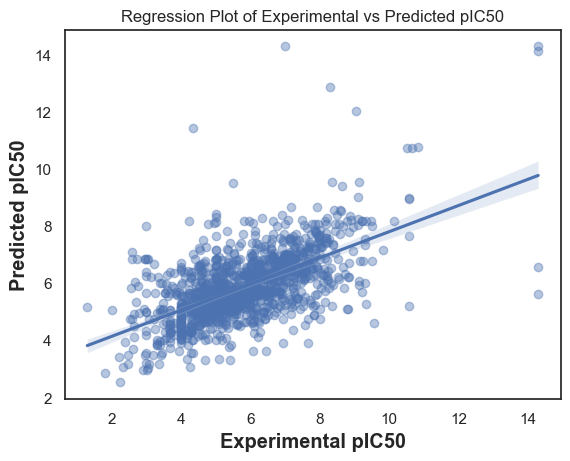

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_pred is the predictions from the model
Y_pred = model.predict(X_test_clean)

# Plot the regression plot using keyword arguments
ax = sns.regplot(x=Y_test_clean['pIC50'], y=Y_pred, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

plt.title('Regression Plot of Experimental vs Predicted pIC50')
plt.show()

In [178]:
print(f"Length of Y_test_clean: {len(Y_test_clean)}")
print(f"Length of Y_pred: {len(Y_pred)}")


Length of Y_test_clean: 1273
Length of Y_pred: 1273


## Compare Regressors

In [182]:
! pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.8 MB/s eta 0:00:00a 0:00:01


In [188]:
! pip install --upgrade lazypredict

In [190]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [192]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

NameError: name 'LazyRegressor' is not defined